In [2]:
# Install gdown for downloading files from Google Drive
!pip install gdown

# Import required libraries
import gdown
import numpy as np

# Define the file URL
file_url = "https://drive.google.com/uc?id=180FkupJQe0Oiq0A1yJg4m5Ggbfw-G8Sc"

# Download the file
output_file = "data.npy"
gdown.download(file_url, output_file, quiet=False)

# Load and print the data
data = np.load(output_file)
print(data)


Downloading...
From: https://drive.google.com/uc?id=180FkupJQe0Oiq0A1yJg4m5Ggbfw-G8Sc
To: /content/data.npy
100%|██████████| 928/928 [00:00<00:00, 1.01MB/s]

[ 40.25196507  39.53010126  37.7992167   37.32837052  28.65394346
  29.69747547  26.10881978  27.83802602  22.99054421  25.80112967
  21.29795526  19.91155621  14.96131425  11.47430672  16.95134087
  13.78849326   9.82605161   6.51423783   7.28107882   4.71364215
   0.82726539   2.0547798    1.75589251   4.69110905  -3.1080814
   6.5508178    9.30439077  -5.9567694    2.87594962   3.1993877
  -2.70786354   2.15378132  -1.77644948  -5.11557224  -4.43062279
   6.25451526   1.9854139    7.74342429  -0.75124188   4.43658355
   2.96815869   1.56463746   0.77572103   6.78279848  -0.71535178
   2.83930294   0.35701732 -14.02823175   2.74610814  -8.92342079
  -5.25805964  -5.91984033 -11.23785323 -11.91938329  -4.2483209
  -0.19964379  -9.63227683 -13.30314598 -13.12628213  -7.21216734
  -6.38891745  -0.4667489   -8.21628152  -3.07657489 -19.52390961
  -9.6384843    4.01358254  -0.04798927   6.13528941   0.47146013
   2.08633153  10.53650805   0.19410599  -1.47248443  12.94164738
   9.22295082

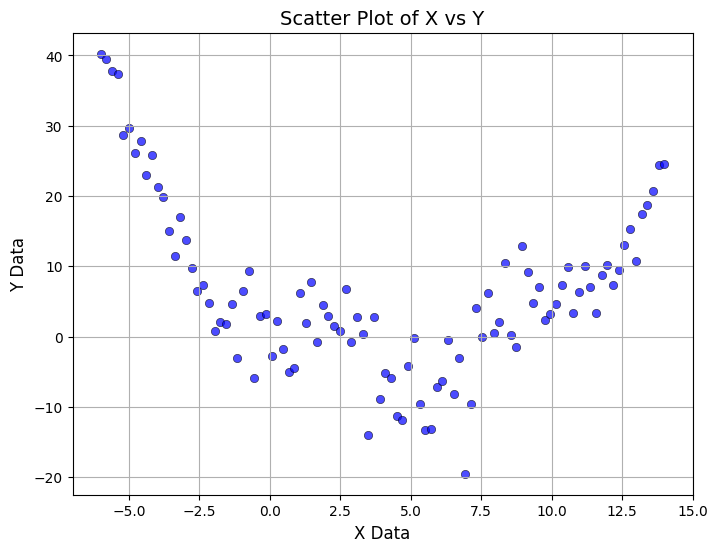

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

y_data = np.load("data.npy")
n_points = len(y_data)

x_data = np.linspace(-6, 14, n_points)

data_df = pd.DataFrame({'x': x_data, 'y': y_data})


plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=data_df, color='blue', alpha=0.7, edgecolor='k')
plt.title("Scatter Plot of X vs Y", fontsize=14)
plt.xlabel("X Data", fontsize=12)
plt.ylabel("Y Data", fontsize=12)
plt.grid(True)
plt.show()


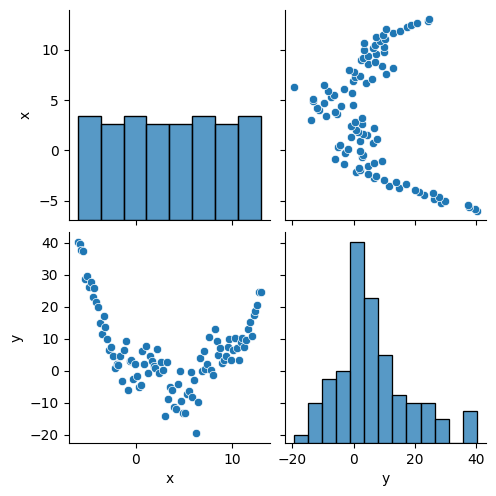

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

y_data = np.load("data.npy")

x_data = np.linspace(-6, 13, len(y_data))

data_df = pd.DataFrame({'x': x_data, 'y': y_data})

sns.pairplot(data_df)

plt.show()


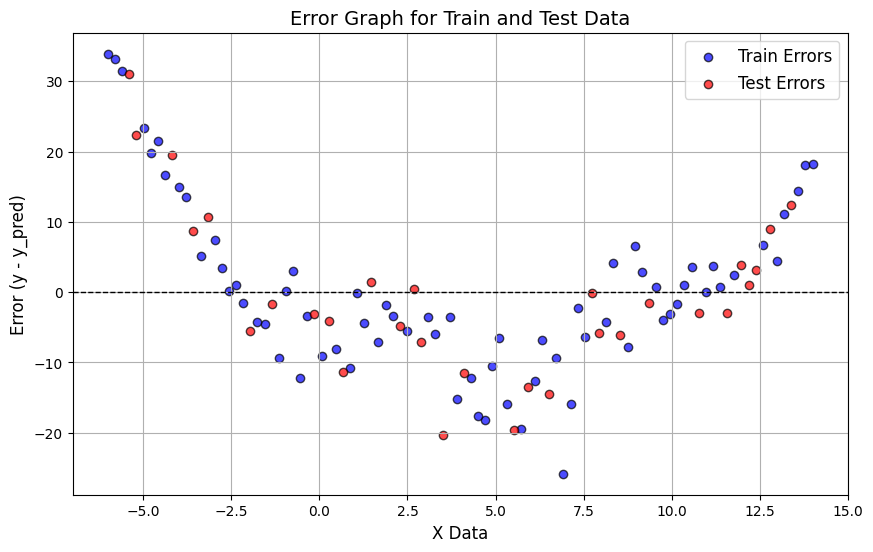

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


y_data = np.load("data.npy")

x_data = np.linspace(-6, 14, n_points)

data_df = pd.DataFrame({'x': x_data, 'y': y_data})

train_data, test_data = train_test_split(data_df, test_size=0.3, random_state=13)

mean_y = data_df['y'].mean()

train_errors = train_data['y'] - mean_y
test_errors = test_data['y'] - mean_y

plt.figure(figsize=(10, 6))

plt.scatter(train_data['x'], train_errors, color='blue', alpha=0.7, label='Train Errors', edgecolor='k')

plt.scatter(test_data['x'], test_errors, color='red', alpha=0.7, label='Test Errors', edgecolor='k')

plt.axhline(0, color='black', linestyle='--', linewidth=1)

plt.title("Error Graph for Train and Test Data", fontsize=14)
plt.xlabel("X Data", fontsize=12)
plt.ylabel("Error (y - y_pred)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


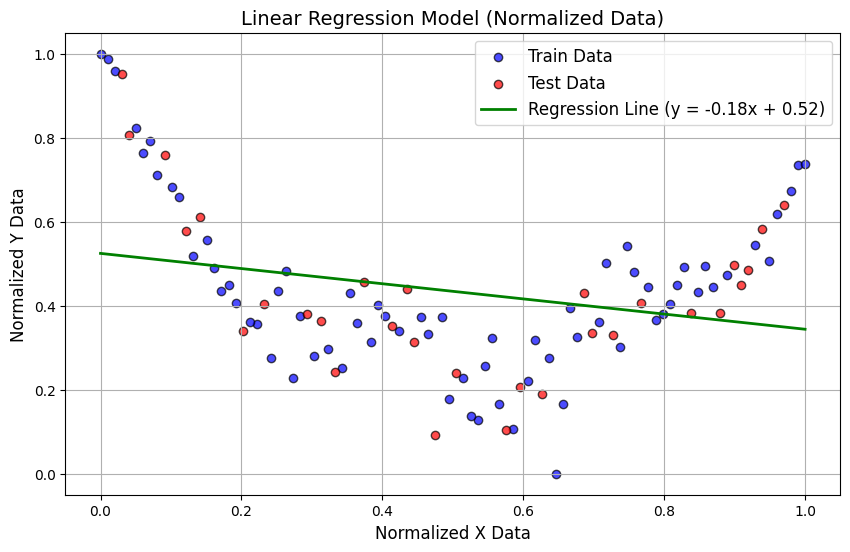

Coefficient (m): -0.1806
Intercept (b): 0.5246


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

y_data = np.load("data.npy")
x_data = np.linspace(-6, 14, len(y_data))

x_min, x_max = x_data.min(), x_data.max()
y_min, y_max = y_data.min(), y_data.max()

x_data_normalized = (x_data - x_min) / (x_max - x_min)
y_data_normalized = (y_data - y_min) / (y_max - y_min)

x_train, x_test, y_train, y_test = train_test_split(x_data_normalized, y_data_normalized, test_size=0.3, random_state=13)

x_mean = np.mean(x_train)
y_mean = np.mean(y_train)

numerator = np.sum((x_train - x_mean) * (y_train - y_mean))
denominator = np.sum((x_train - x_mean) ** 2)
m = numerator / denominator

b = y_mean - m * x_mean

y_train_pred = m * x_train + b
y_test_pred = m * x_test + b

plt.figure(figsize=(10, 6))

plt.scatter(x_train, y_train, color="blue", alpha=0.7, label="Train Data", edgecolor="k")
plt.scatter(x_test, y_test, color="red", alpha=0.7, label="Test Data", edgecolor="k")

x_line = np.linspace(0, 1, 100)
y_line = m * x_line + b
plt.plot(x_line, y_line, color="green", linewidth=2, label=f"Regression Line (y = {m:.2f}x + {b:.2f})")

plt.title("Linear Regression Model (Normalized Data)", fontsize=14)
plt.xlabel("Normalized X Data", fontsize=12)
plt.ylabel("Normalized Y Data", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

print(f"Coefficient (m): {m:.4f}")
print(f"Intercept (b): {b:.4f}")



In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Train Set Metrics:")
print(f"Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Mean Absolute Error (MAE): {mae_train:.4f}")
print(f"R^2 Score: {r2_train:.4f}")

print("\nTest Set Metrics:")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"R^2 Score: {r2_test:.4f}")


Train Set Metrics:
Mean Squared Error (MSE): 0.0392
Mean Absolute Error (MAE): 0.1586
R^2 Score: 0.0658

Test Set Metrics:
Mean Squared Error (MSE): 0.0338
Mean Absolute Error (MAE): 0.1466
R^2 Score: 0.0864


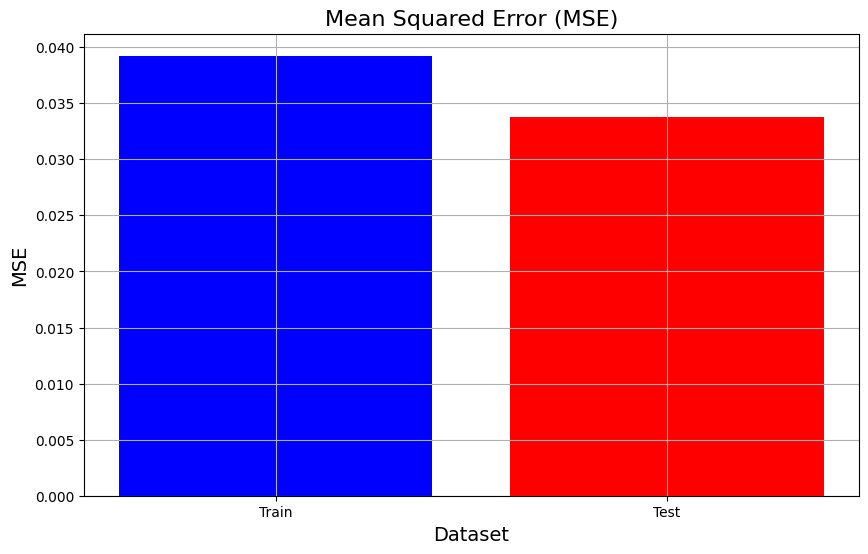

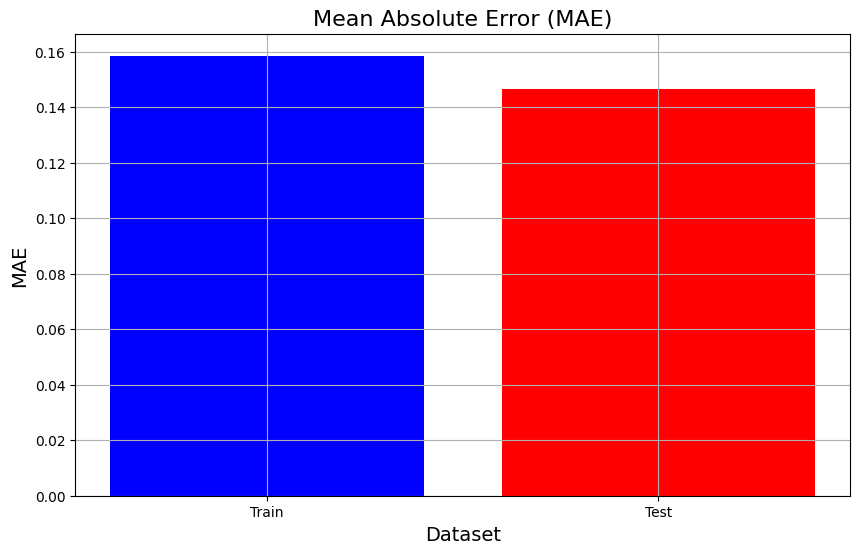

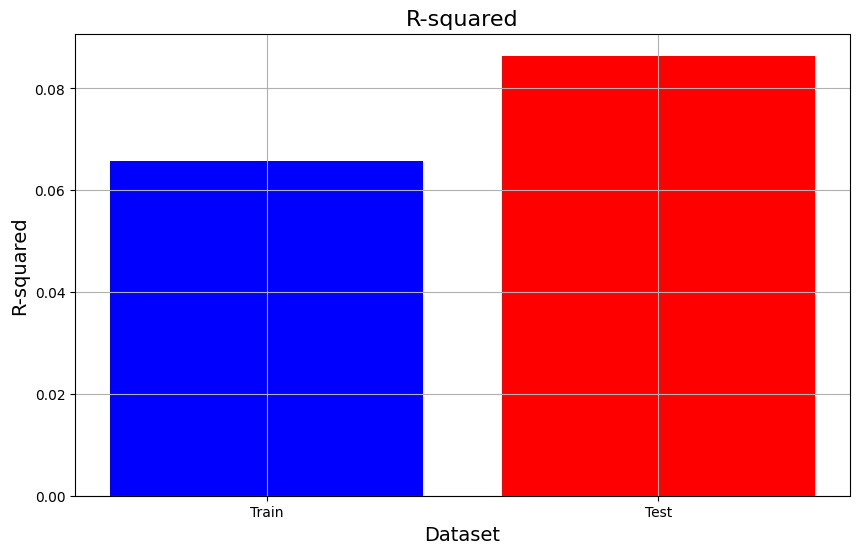

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler


scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_train_scaled = scaler_x.fit_transform(x_train.reshape(-1, 1))
x_test_scaled = scaler_x.transform(x_test.reshape(-1, 1))

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

model = LinearRegression()

model.fit(x_train_scaled, y_train_scaled)

w_scaled = model.coef_[0]
b_scaled = model.intercept_
y_train_pred_scaled = w_scaled * x_train_scaled + b_scaled
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()

train_metrics = [
    mean_squared_error(y_train, y_train_pred),
    mean_absolute_error(y_train, y_train_pred),
    r2_score(y_train, y_train_pred)
]

y_test_pred_scaled = w_scaled * x_test_scaled + b_scaled
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()

test_metrics = [
    mean_squared_error(y_test, y_test_pred),
    mean_absolute_error(y_test, y_test_pred),
    r2_score(y_test, y_test_pred)
]

def plot_bar_chart(metrics, title, ylabel, labels=['Train', 'Test']):
    plt.figure(figsize=(10, 6))
    plt.bar(labels, metrics, color=['blue', 'red'])
    plt.title(title, fontsize=16)
    plt.ylabel(ylabel, fontsize=14)
    plt.xlabel('Dataset', fontsize=14)
    plt.grid(True)
    plt.show()

plot_bar_chart([train_metrics[0], test_metrics[0]],
               title='Mean Squared Error (MSE)',
               ylabel='MSE')

plot_bar_chart([train_metrics[1], test_metrics[1]],
               title='Mean Absolute Error (MAE)',
               ylabel='MAE')

plot_bar_chart([train_metrics[2], test_metrics[2]],
               title='R-squared',
               ylabel='R-squared')


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


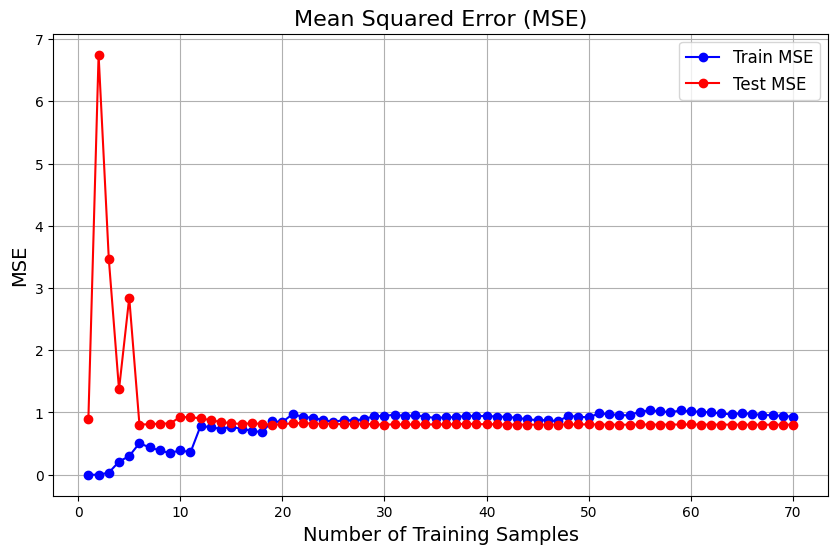

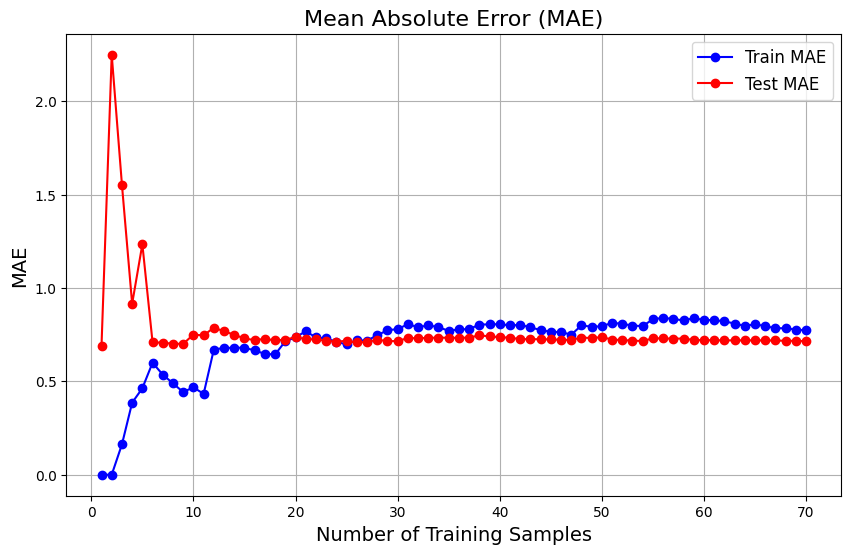

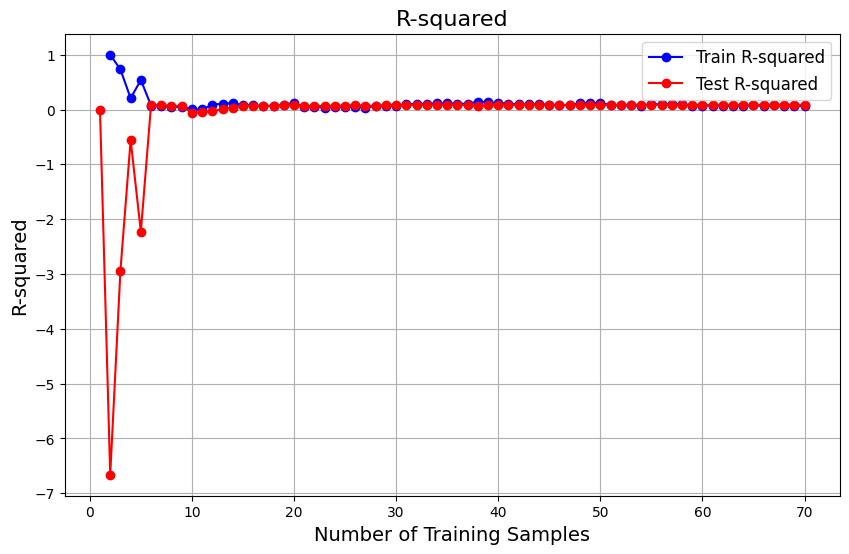

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

train_sizes = []
train_mse, train_mae, train_r2 = [], [], []
test_mse, test_mae, test_r2 = [], [], []

for i in range(1, len(x_train_scaled) + 1):
    x_train_subset = x_train_scaled[:i].reshape(-1, 1)
    y_train_subset = y_train_scaled[:i]

    model.fit(x_train_subset, y_train_subset)

    y_train_subset_pred = model.predict(x_train_subset)
    train_mse.append(mean_squared_error(y_train_subset, y_train_subset_pred))
    train_mae.append(mean_absolute_error(y_train_subset, y_train_subset_pred))
    train_r2.append(r2_score(y_train_subset, y_train_subset_pred))

    y_test_pred = model.predict(x_test_scaled.reshape(-1, 1))
    test_mse.append(mean_squared_error(y_test_scaled, y_test_pred))
    test_mae.append(mean_absolute_error(y_test_scaled, y_test_pred))
    test_r2.append(r2_score(y_test_scaled, y_test_pred))

    train_sizes.append(i)

def plot_metric(train_metric, test_metric, title, ylabel, train_label, test_label):
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_metric, label=train_label, color='blue', marker='o')
    plt.plot(train_sizes, test_metric, label=test_label, color='red', marker='o')
    plt.title(title, fontsize=16)
    plt.xlabel('Number of Training Samples', fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

plot_metric(train_mse, test_mse,
            title='Mean Squared Error (MSE)',
            ylabel='MSE',
            train_label='Train MSE',
            test_label='Test MSE')

plot_metric(train_mae, test_mae,
            title='Mean Absolute Error (MAE)',
            ylabel='MAE',
            train_label='Train MAE',
            test_label='Test MAE')

plot_metric(train_r2, test_r2,
            title='R-squared',
            ylabel='R-squared',
            train_label='Train R-squared',
            test_label='Test R-squared')




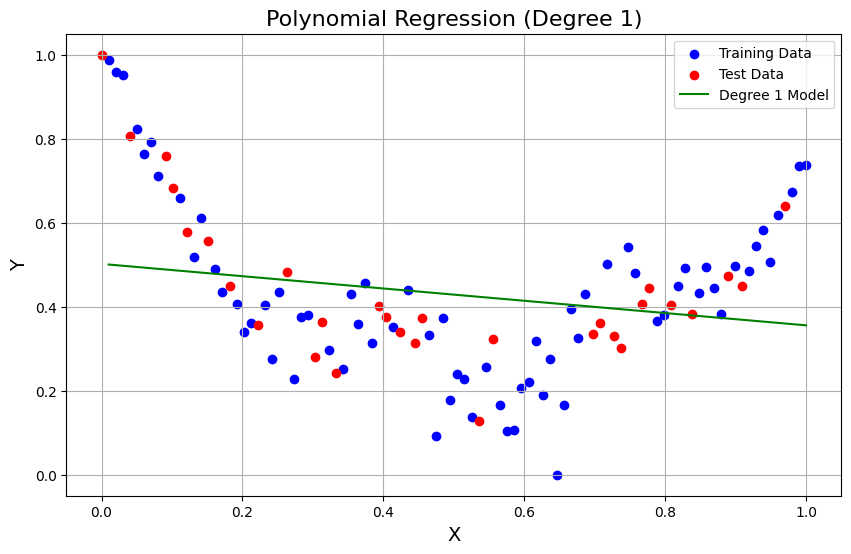

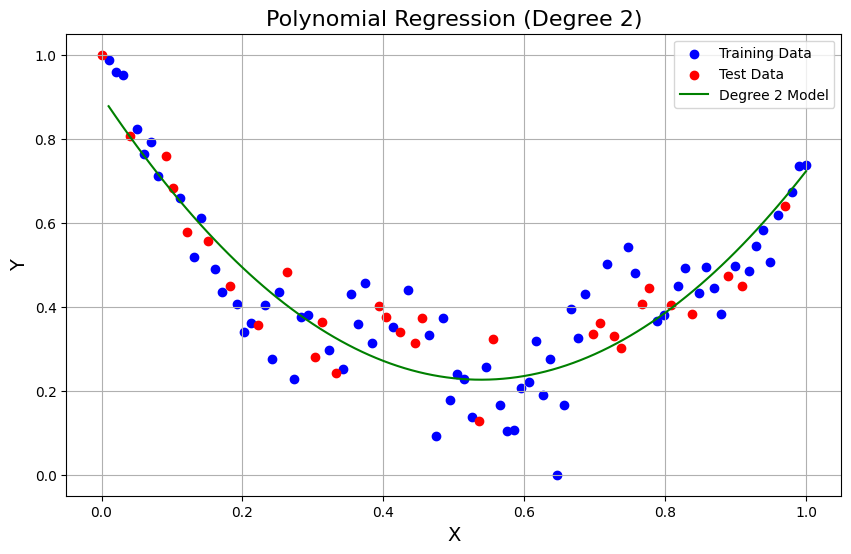

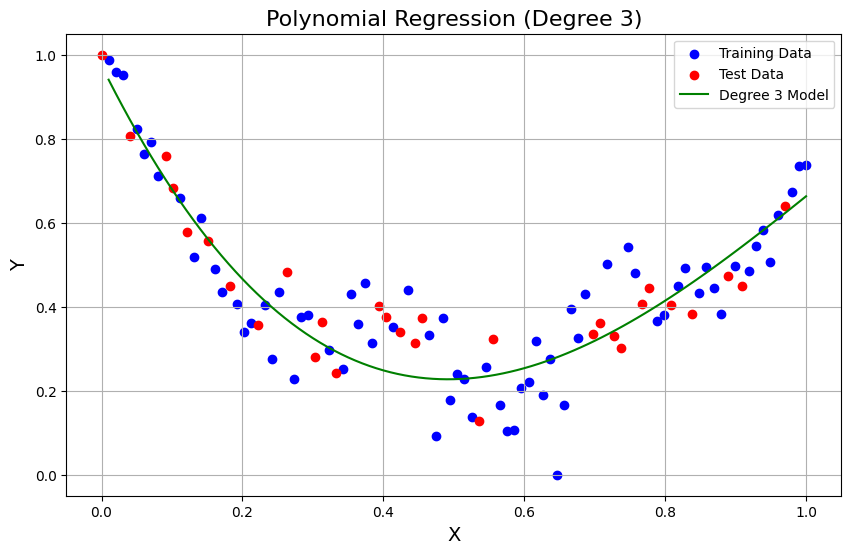

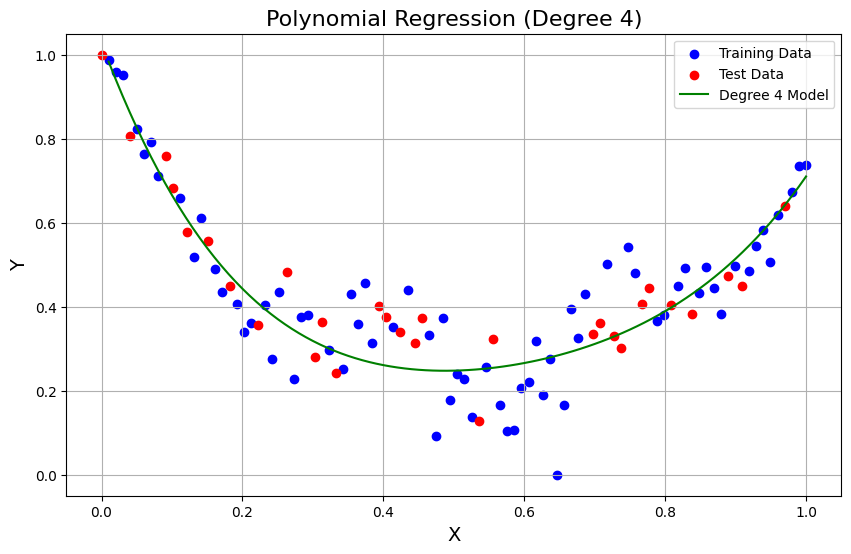

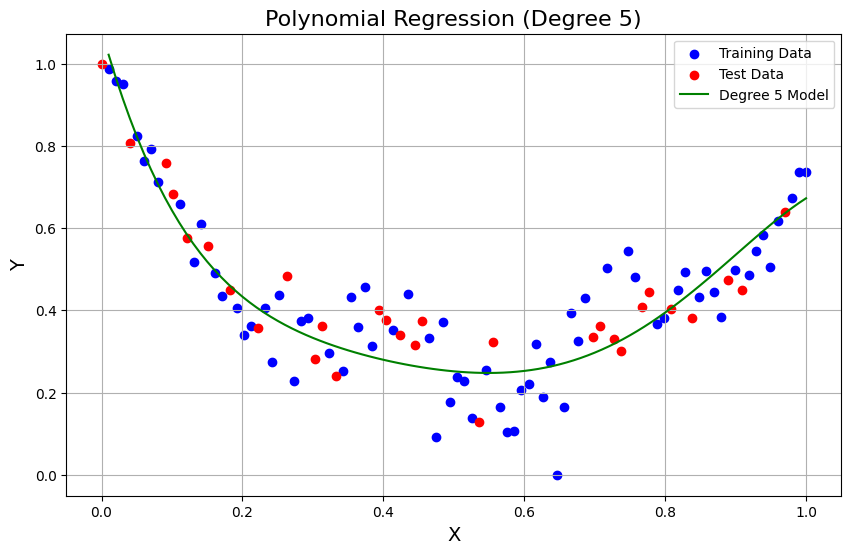

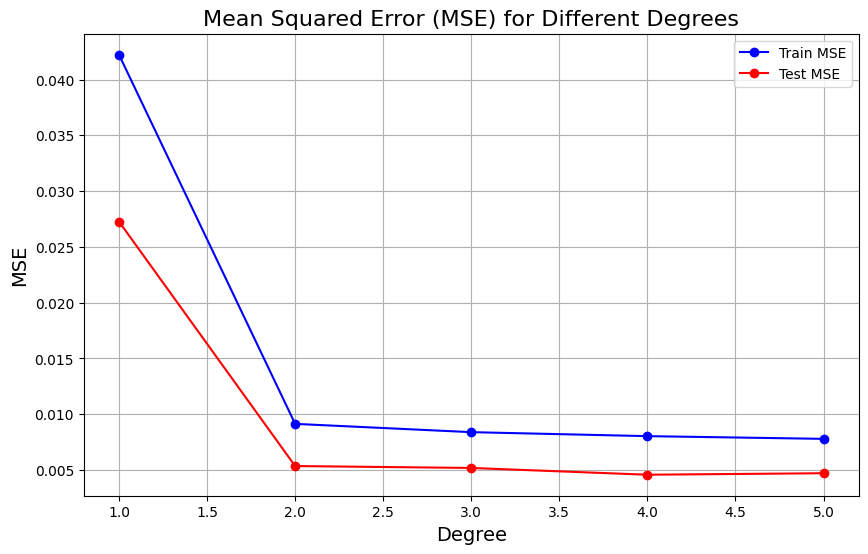

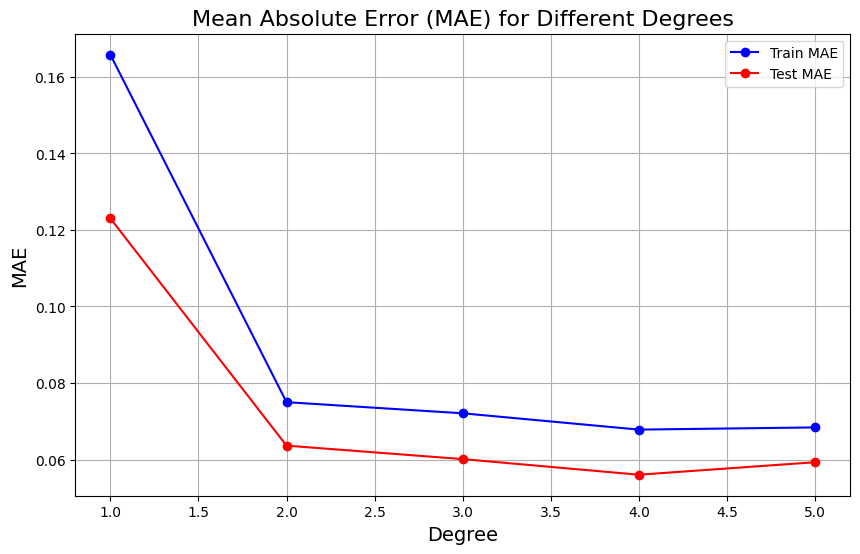

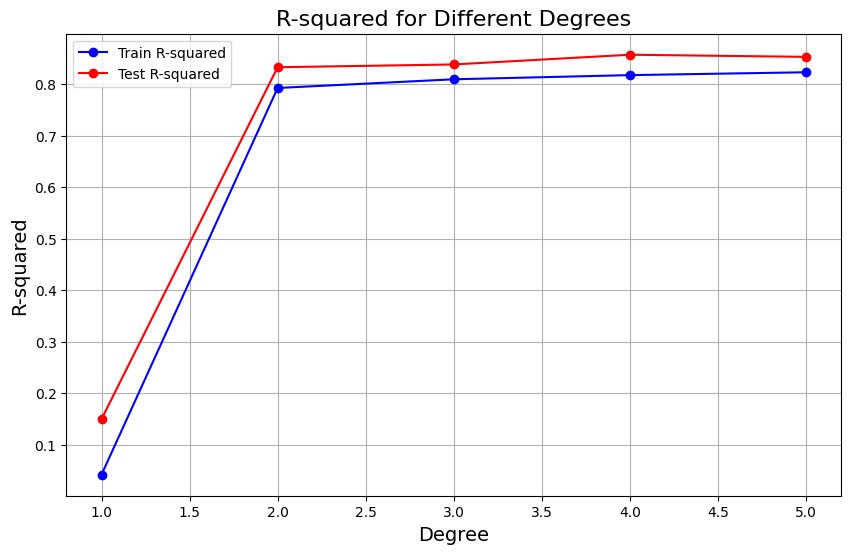

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


def train_polynomial_regression(degree):

    poly = PolynomialFeatures(degree=degree)
    x_train_poly = poly.fit_transform(x_train.reshape(-1, 1))
    x_test_poly = poly.transform(x_test.reshape(-1, 1))

    model = LinearRegression()
    model.fit(x_train_poly, y_train)

    y_train_pred = model.predict(x_train_poly)
    y_test_pred = model.predict(x_test_poly)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    return train_mse, test_mse, train_mae, test_mae, train_r2, test_r2, model, poly

degrees = [1, 2, 3, 4, 5]
train_mse_list = []
test_mse_list = []
train_mae_list = []
test_mae_list = []
train_r2_list = []
test_r2_list = []

for degree in degrees:
    train_mse, test_mse, train_mae, test_mae, train_r2, test_r2, model, poly = train_polynomial_regression(degree)

    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)
    train_mae_list.append(train_mae)
    test_mae_list.append(test_mae)
    train_r2_list.append(train_r2)
    test_r2_list.append(test_r2)

    x_plot = np.linspace(min(x_train), max(x_train), 100).reshape(-1, 1)
    y_plot = model.predict(poly.transform(x_plot))

    plt.figure(figsize=(10, 6))
    plt.scatter(x_train, y_train, color='blue', label='Training Data')
    plt.scatter(x_test, y_test, color='red', label='Test Data')
    plt.plot(x_plot, y_plot, color='green', label=f'Degree {degree} Model')
    plt.title(f'Polynomial Regression (Degree {degree})', fontsize=16)
    plt.xlabel('X', fontsize=14)
    plt.ylabel('Y', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

plt.figure(figsize=(10, 6))
plt.plot(degrees, train_mse_list, label='Train MSE', color='blue', marker='o')
plt.plot(degrees, test_mse_list, label='Test MSE', color='red', marker='o')
plt.title('Mean Squared Error (MSE) for Different Degrees', fontsize=16)
plt.xlabel('Degree', fontsize=14)
plt.ylabel('MSE', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(degrees, train_mae_list, label='Train MAE', color='blue', marker='o')
plt.plot(degrees, test_mae_list, label='Test MAE', color='red', marker='o')
plt.title('Mean Absolute Error (MAE) for Different Degrees', fontsize=16)
plt.xlabel('Degree', fontsize=14)
plt.ylabel('MAE', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(degrees, train_r2_list, label='Train R-squared', color='blue', marker='o')
plt.plot(degrees, test_r2_list, label='Test R-squared', color='red', marker='o')
plt.title('R-squared for Different Degrees', fontsize=16)
plt.xlabel('Degree', fontsize=14)
plt.ylabel('R-squared', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


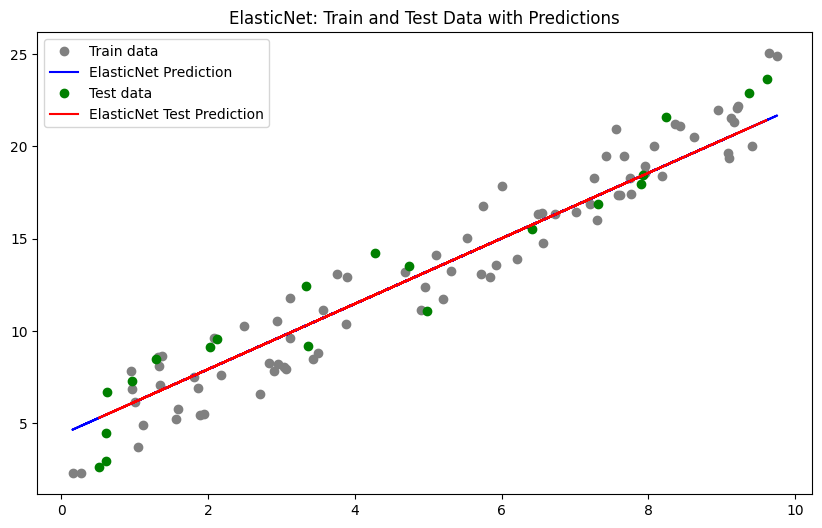

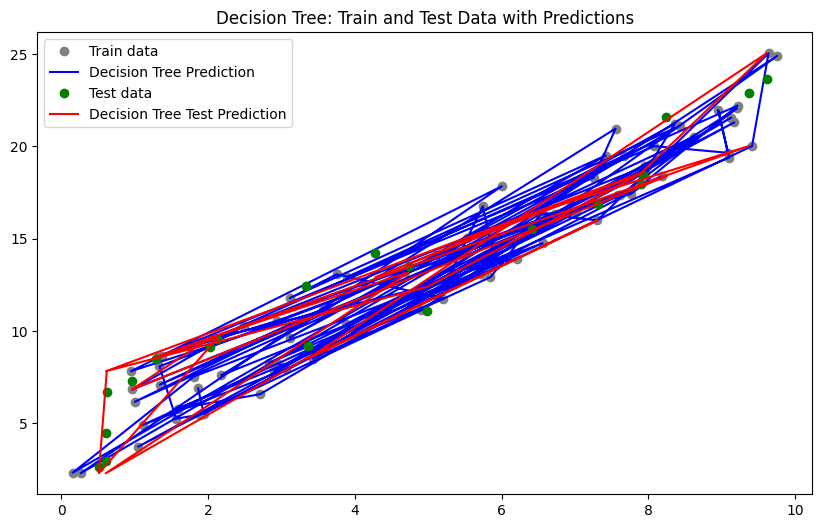

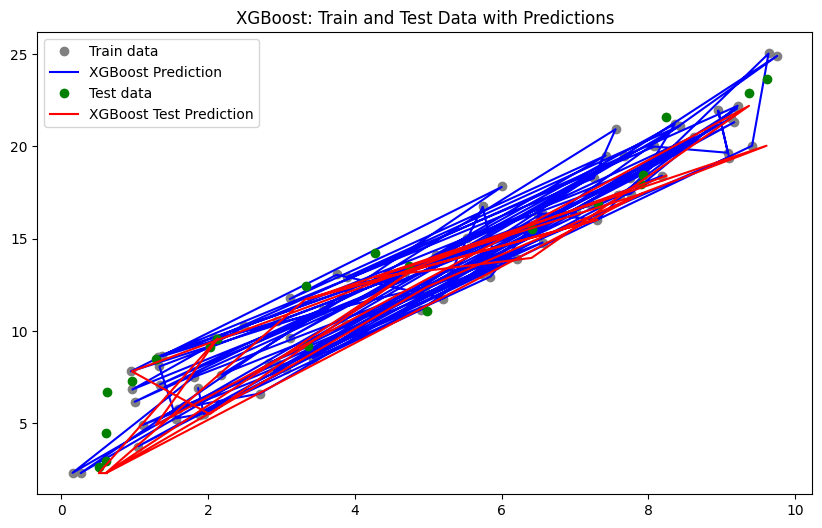

In [21]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

x_data = np.random.rand(100, 1) * 10
y_data = 2 * x_data + 1 + (np.random.rand(100, 1) * 5)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

scaler_x = StandardScaler()
scaler_y = StandardScaler()
x_train_scaled = scaler_x.fit_transform(x_train)
x_test_scaled = scaler_x.transform(x_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
decision_tree = DecisionTreeRegressor(random_state=42)
xgboost_model = XGBRegressor()

elastic_net.fit(x_train_scaled, y_train_scaled)
decision_tree.fit(x_train_scaled, y_train_scaled)
xgboost_model.fit(x_train_scaled, y_train_scaled)

y_train_pred_en = elastic_net.predict(x_train_scaled)
y_test_pred_en = elastic_net.predict(x_test_scaled)

y_train_pred_dt = decision_tree.predict(x_train_scaled)
y_test_pred_dt = decision_tree.predict(x_test_scaled)

y_train_pred_xgb = xgboost_model.predict(x_train_scaled)
y_test_pred_xgb = xgboost_model.predict(x_test_scaled)

y_train_pred_en = scaler_y.inverse_transform(y_train_pred_en.reshape(-1, 1)).flatten()
y_test_pred_en = scaler_y.inverse_transform(y_test_pred_en.reshape(-1, 1)).flatten()

y_train_pred_dt = scaler_y.inverse_transform(y_train_pred_dt.reshape(-1, 1)).flatten()
y_test_pred_dt = scaler_y.inverse_transform(y_test_pred_dt.reshape(-1, 1)).flatten()

y_train_pred_xgb = scaler_y.inverse_transform(y_train_pred_xgb.reshape(-1, 1)).flatten()
y_test_pred_xgb = scaler_y.inverse_transform(y_test_pred_xgb.reshape(-1, 1)).flatten()

plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, 'o', label="Train data", color='gray')
plt.plot(x_train, y_train_pred_en, label="ElasticNet Prediction", color='blue')
plt.plot(x_test, y_test, 'o', label="Test data", color='green')
plt.plot(x_test, y_test_pred_en, label="ElasticNet Test Prediction", color='red')
plt.title("ElasticNet: Train and Test Data with Predictions")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, 'o', label="Train data", color='gray')
plt.plot(x_train, y_train_pred_dt, label="Decision Tree Prediction", color='blue')
plt.plot(x_test, y_test, 'o', label="Test data", color='green')
plt.plot(x_test, y_test_pred_dt, label="Decision Tree Test Prediction", color='red')
plt.title("Decision Tree: Train and Test Data with Predictions")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, 'o', label="Train data", color='gray')
plt.plot(x_train, y_train_pred_xgb, label="XGBoost Prediction", color='blue')
plt.plot(x_test, y_test, 'o', label="Test data", color='green')
plt.plot(x_test, y_test_pred_xgb, label="XGBoost Test Prediction", color='red')
plt.title("XGBoost: Train and Test Data with Predictions")
plt.legend()
plt.show()


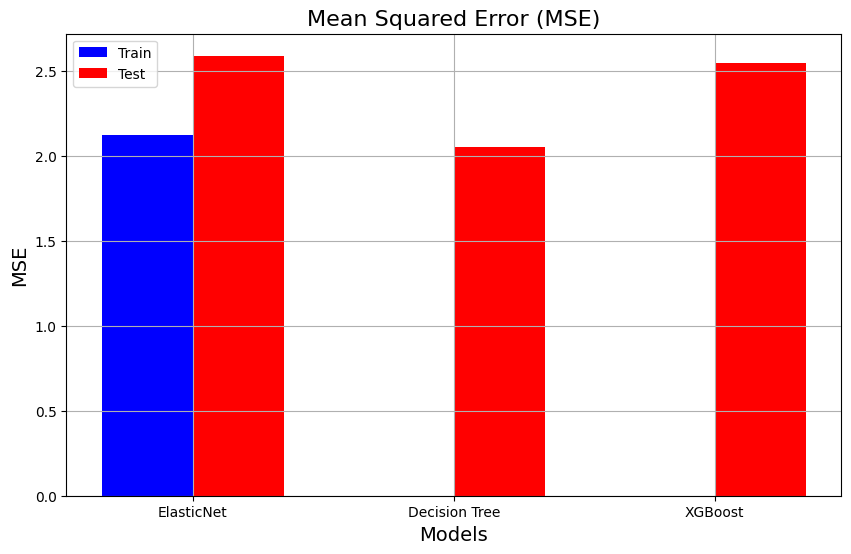

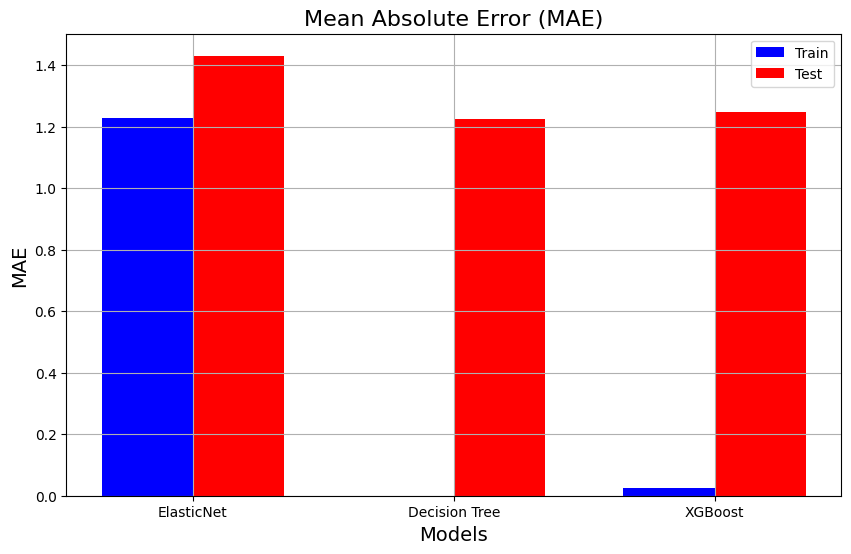

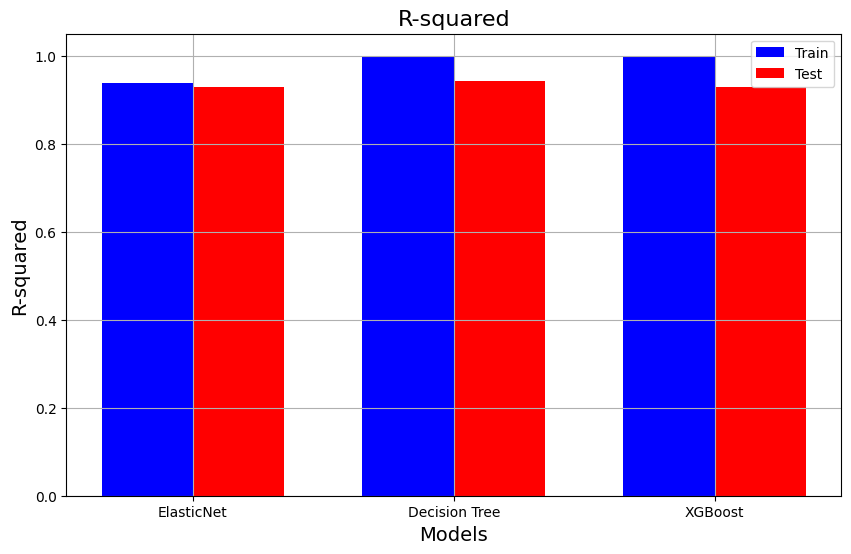

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

x_data = np.random.rand(100, 1) * 10
y_data = 2 * x_data + 1 + (np.random.rand(100, 1) * 5)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

scaler_x = StandardScaler()
scaler_y = StandardScaler()
x_train_scaled = scaler_x.fit_transform(x_train)
x_test_scaled = scaler_x.transform(x_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
decision_tree = DecisionTreeRegressor(random_state=42)
xgboost_model = XGBRegressor()

elastic_net.fit(x_train_scaled, y_train_scaled)
decision_tree.fit(x_train_scaled, y_train_scaled)
xgboost_model.fit(x_train_scaled, y_train_scaled)

y_train_pred_en = elastic_net.predict(x_train_scaled)
y_test_pred_en = elastic_net.predict(x_test_scaled)

y_train_pred_dt = decision_tree.predict(x_train_scaled)
y_test_pred_dt = decision_tree.predict(x_test_scaled)

y_train_pred_xgb = xgboost_model.predict(x_train_scaled)
y_test_pred_xgb = xgboost_model.predict(x_test_scaled)

y_train_pred_en = scaler_y.inverse_transform(y_train_pred_en.reshape(-1, 1)).flatten()
y_test_pred_en = scaler_y.inverse_transform(y_test_pred_en.reshape(-1, 1)).flatten()

y_train_pred_dt = scaler_y.inverse_transform(y_train_pred_dt.reshape(-1, 1)).flatten()
y_test_pred_dt = scaler_y.inverse_transform(y_test_pred_dt.reshape(-1, 1)).flatten()

y_train_pred_xgb = scaler_y.inverse_transform(y_train_pred_xgb.reshape(-1, 1)).flatten()
y_test_pred_xgb = scaler_y.inverse_transform(y_test_pred_xgb.reshape(-1, 1)).flatten()

def calculate_errors(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

errors_en_train = calculate_errors(y_train, y_train_pred_en)
errors_en_test = calculate_errors(y_test, y_test_pred_en)

errors_dt_train = calculate_errors(y_train, y_train_pred_dt)
errors_dt_test = calculate_errors(y_test, y_test_pred_dt)

errors_xgb_train = calculate_errors(y_train, y_train_pred_xgb)
errors_xgb_test = calculate_errors(y_test, y_test_pred_xgb)

models = ['ElasticNet', 'Decision Tree', 'XGBoost']
mse_train = [errors_en_train[0], errors_dt_train[0], errors_xgb_train[0]]
mse_test = [errors_en_test[0], errors_dt_test[0], errors_xgb_test[0]]

mae_train = [errors_en_train[1], errors_dt_train[1], errors_xgb_train[1]]
mae_test = [errors_en_test[1], errors_dt_test[1], errors_xgb_test[1]]

r2_train = [errors_en_train[2], errors_dt_train[2], errors_xgb_train[2]]
r2_test = [errors_en_test[2], errors_dt_test[2], errors_xgb_test[2]]

plt.figure(figsize=(10, 6))
width = 0.35
x = np.arange(len(models))

plt.bar(x - width/2, mse_train, width, label='Train', color='blue')
plt.bar(x + width/2, mse_test, width, label='Test', color='red')

plt.title('Mean Squared Error (MSE)', fontsize=16)
plt.ylabel('MSE', fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.xticks(x, models)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, mae_train, width, label='Train', color='blue')
plt.bar(x + width/2, mae_test, width, label='Test', color='red')

plt.title('Mean Absolute Error (MAE)', fontsize=16)
plt.ylabel('MAE', fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.xticks(x, models)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, r2_train, width, label='Train', color='blue')
plt.bar(x + width/2, r2_test, width, label='Test', color='red')

plt.title('R-squared', fontsize=16)
plt.ylabel('R-squared', fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.xticks(x, models)
plt.legend()
plt.grid(True)
plt.show()
